<a href="https://colab.research.google.com/github/Tejaswi-kashyap-006/Autoencoder/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
data = make_blobs(n_samples=300,
                  n_features=2,
                  centers=2,
                  cluster_std=1.0, random_state=101)

In [ ]:
X, y = data

In [ ]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [ ]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [ ]:
feat = pd.DataFrame(X)

In [ ]:
feat = pd.concat([feat,z_noise],axis=1)

In [ ]:
feat

,0,1,0
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118
...,...,...,...
295,1.320546,2.605592,1.523750
296,-8.043916,-6.010589,1.290230
297,-9.733566,-7.460380,-1.478319
298,-10.722075,-5.568565,0.214234


In [ ]:
feat.columns = ['X1','X2','X3']

In [ ]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


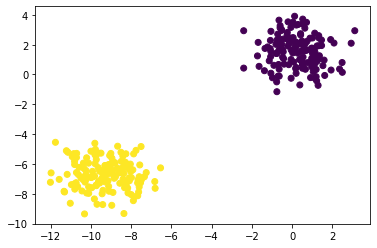

In [ ]:
plt.scatter(feat['X1'], feat['X2'], c=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [ ]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu', input_shape=[2]))

In [ ]:
autoencoder = Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=2.0))

In [ ]:
!pip install scikit-learn==0.24.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [ ]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3297
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3297
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3297
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3297
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3297


In [ ]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 1ms/step


In [ ]:
encoded_2dim.shape

(300, 2)

In [ ]:
scaled_data.shape

(300, 3)

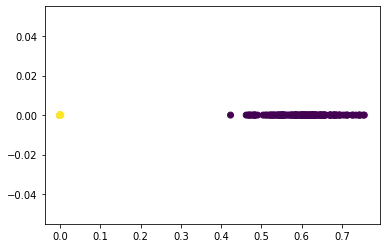

In [ ]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)